C:\Users\student\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\student\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\student\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\student\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:14

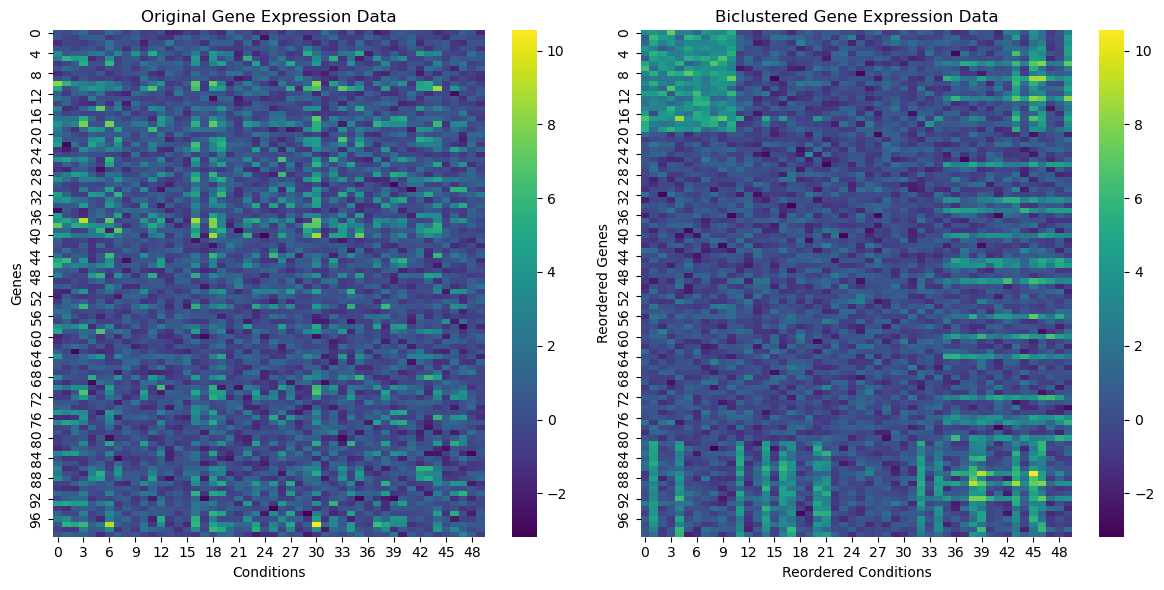

Discovered Biclusters:

Bicluster 1:
  Rows (Genes): 20 genes
  Columns (Conditions): 11 conditions

Bicluster 2:
  Rows (Genes): 20 genes
  Columns (Conditions): 24 conditions

Bicluster 3:
  Rows (Genes): 20 genes
  Columns (Conditions): 15 conditions


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralBiclustering

# 1. Generate synthetic gene expression data with known biclusters
# A real-world dataset would be read from a file, e.g., using pandas.
# This code creates a matrix representing genes (rows) and conditions (columns).
n_genes = 100
n_conditions = 50
n_biclusters = 3
noise = 0.5

# Create a base matrix of random noise
np.random.seed(42)
data_matrix = np.random.normal(size=(n_genes, n_conditions))

# Introduce distinct expression patterns for different biclusters
for i in range(n_biclusters):
    # Select random subsets of genes and conditions for each bicluster
    gene_indices = np.random.choice(n_genes, size=20, replace=False)
    cond_indices = np.random.choice(n_conditions, size=15, replace=False)
    
    # Define a high-expression pattern for the bicluster
    pattern = np.random.uniform(2, 5, size=(len(gene_indices), len(cond_indices)))
    data_matrix[np.ix_(gene_indices, cond_indices)] += pattern

# 2. Apply the biclustering algorithm
# The SpectralBiclustering model is configured to find 3 clusters.
model = SpectralBiclustering(n_clusters=n_biclusters, random_state=42)
model.fit(data_matrix)

# 3. Visualize the results
# Rearrange the matrix based on the biclustering results to show the clusters.
fit_data = data_matrix[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

# Plot the original and biclustered heatmaps
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

sns.heatmap(data_matrix, ax=ax1, cmap="viridis")
ax1.set_title("Original Gene Expression Data")
ax1.set_xlabel("Conditions")
ax1.set_ylabel("Genes")

sns.heatmap(fit_data, ax=ax2, cmap="viridis")
ax2.set_title("Biclustered Gene Expression Data")
ax2.set_xlabel("Reordered Conditions")
ax2.set_ylabel("Reordered Genes")

plt.tight_layout()
plt.show()

# 4. Interpret the output
# The 'rows_' and 'columns_' attributes of the fitted model indicate the bicluster membership.
print("Discovered Biclusters:")
for i in range(model.n_clusters):
    # Get the row and column indices for each bicluster
    row_bicluster_indices = np.where(model.rows_[i])[0]
    col_bicluster_indices = np.where(model.columns_[i])[0]
    
    print(f"\nBicluster {i+1}:")
    print(f"  Rows (Genes): {len(row_bicluster_indices)} genes")
    print(f"  Columns (Conditions): {len(col_bicluster_indices)} conditions")
    # Uncomment for detailed gene and condition lists
    # print(f"  Gene Indices: {row_bicluster_indices}")
    # print(f"  Condition Indices: {col_bicluster_indices}")
